In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [20]:
# load the wines dataset (datasets/wines.csv)
# add code here
wines = pd.read_csv("../../Datasets/wines.csv")
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,NaN,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,NaN,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# do some initial exploratory data analysis
# add code here
wines.describe()
wines.info()
wines.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       163 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           155 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

(178, 14)

In [9]:
# check for missing values in the dataset
# add code here
wines.isna().sum()

alcohol                         15
malic_acid                       0
ash                             23
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64

In [10]:
# if any, impute the missing values with the mean of the column
# add code here
wines.fillna(wines.median(), inplace=True)
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,13.05,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.36,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
# scale the features using StandardScaler
# add code here
scaler = StandardScaler()
wines_scaled = scaler.fit_transform(wines.iloc[:, :-1])
wines_scaled

array([[ 1.59647107, -0.5622498 ,  0.25659068, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.25812171, -0.49941338, -0.85179518, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.20614697,  0.02123125, -0.01095073, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.34907749,  1.74474449, -0.01095073, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.21914066,  0.22769377,  0.02726947, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.46653424,  1.58316512,  1.44141695, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
# perform hierarchical clustering on the dataset
# add code here
from scipy.cluster.hierarchy import linkage

Z = linkage(wines_scaled, method = "single", metric = "euclidean")
Z

array([[  9.        ,  47.        ,   1.17620697,   2.        ],
       [ 11.        ,  12.        ,   1.18872867,   2.        ],
       [131.        , 133.        ,   1.19464415,   2.        ],
       [ 15.        ,  53.        ,   1.22701222,   2.        ],
       [ 92.        , 107.        ,   1.24564682,   2.        ],
       [ 27.        ,  37.        ,   1.26251124,   2.        ],
       [104.        , 116.        ,   1.26267792,   2.        ],
       [  0.        ,  20.        ,   1.30054091,   2.        ],
       [ 16.        ,  17.        ,   1.31037616,   2.        ],
       [164.        , 172.        ,   1.32480217,   2.        ],
       [ 56.        , 185.        ,   1.32950575,   3.        ],
       [ 22.        ,  29.        ,   1.35191065,   2.        ],
       [ 40.        , 188.        ,   1.37059133,   4.        ],
       [ 63.        ,  98.        ,   1.3856454 ,   2.        ],
       [140.        , 142.        ,   1.38810835,   2.        ],
       [162.        , 192

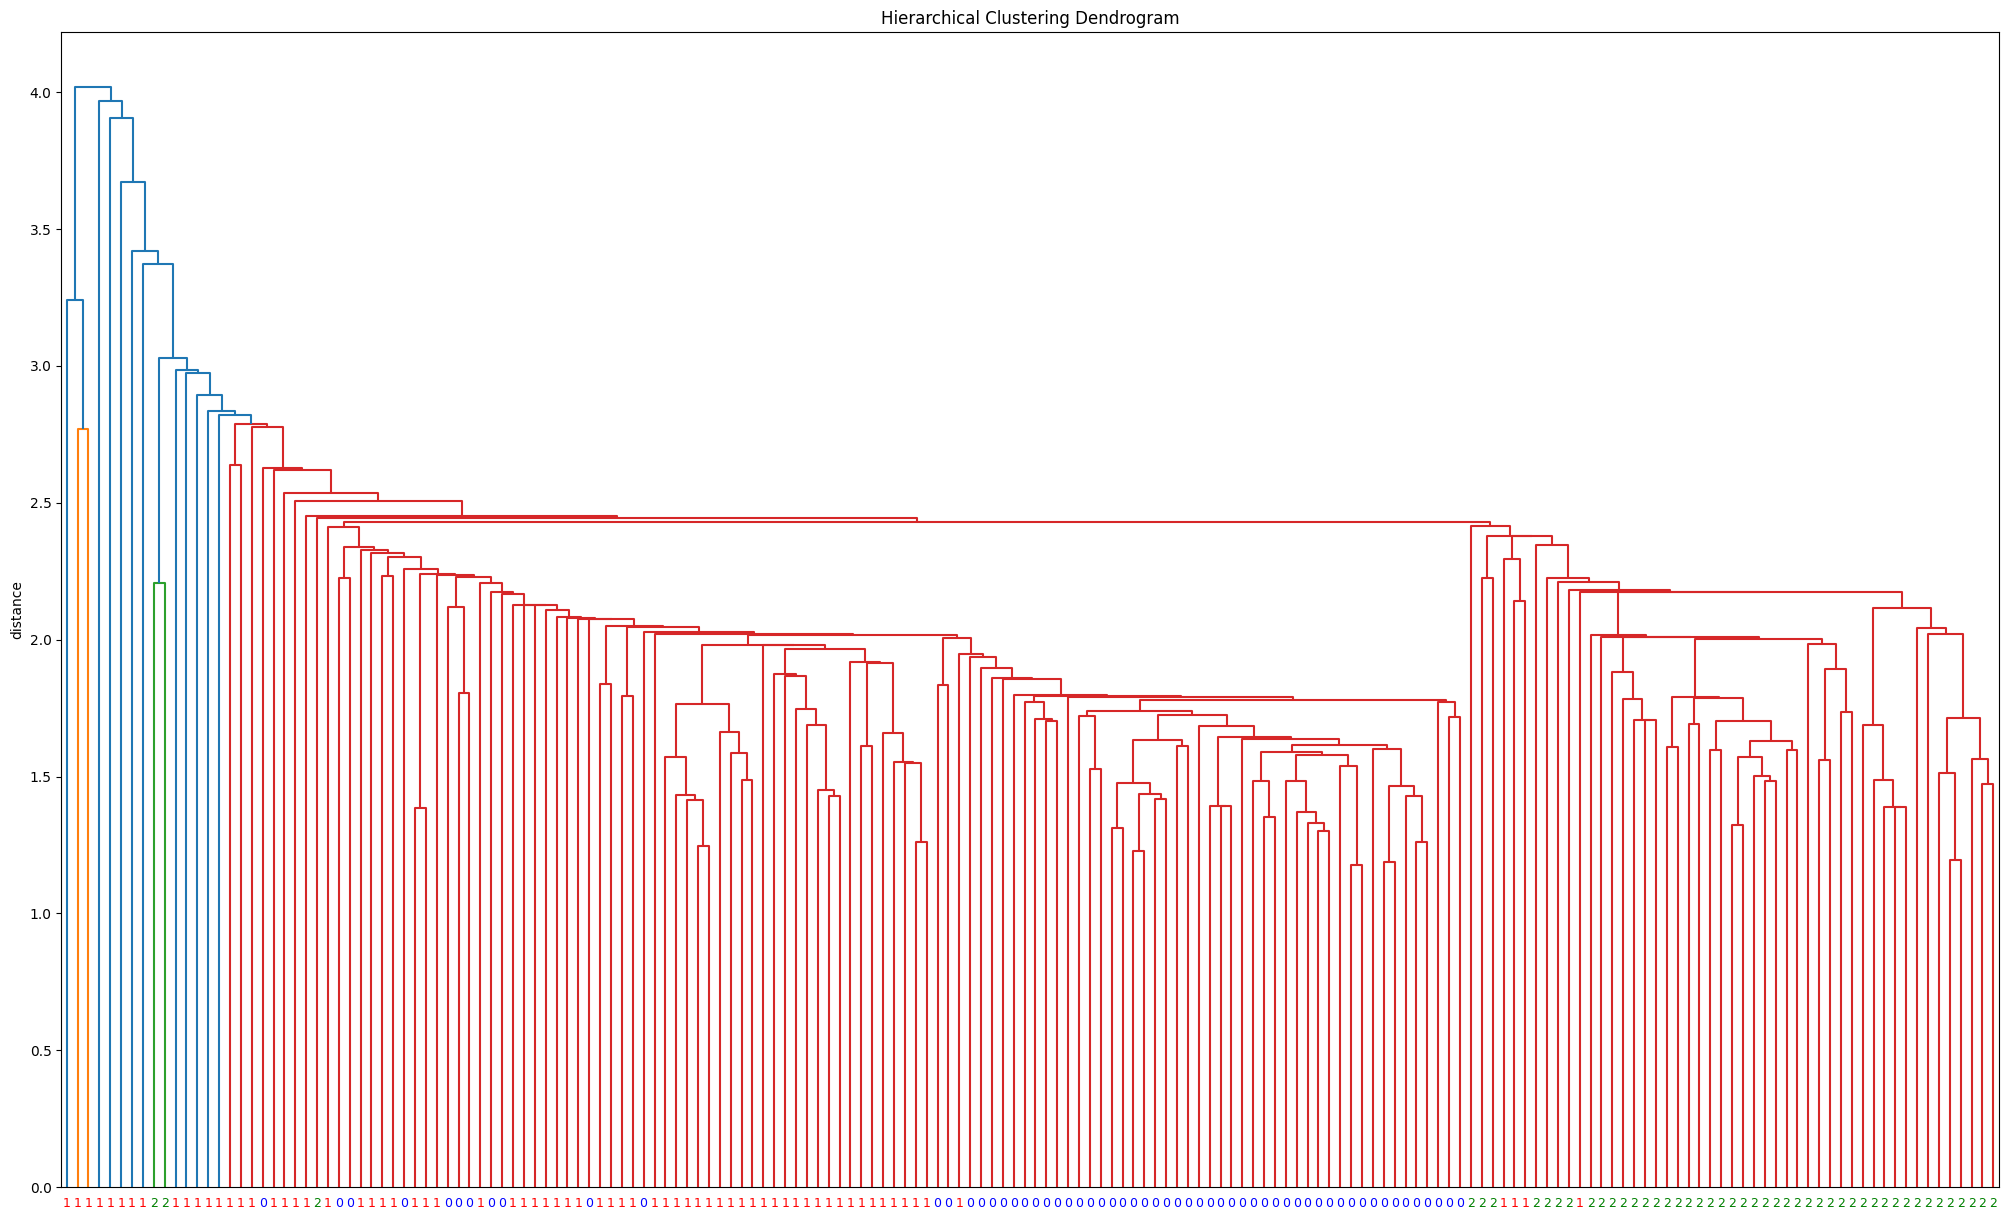

In [13]:
# plot the dendrogram
# add code here
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

plt.figure(figsize = (25, 15)) # Create a figure

dendrogram(
            Z,
            labels= np.array(wines.iloc[: ,13]),                # Create a dendogram
            leaf_rotation= 0,
            leaf_font_size= 9
)

# Give to the plot the Title and the Y's meaning
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {"0": "b", "1": "r", "2": "g"}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

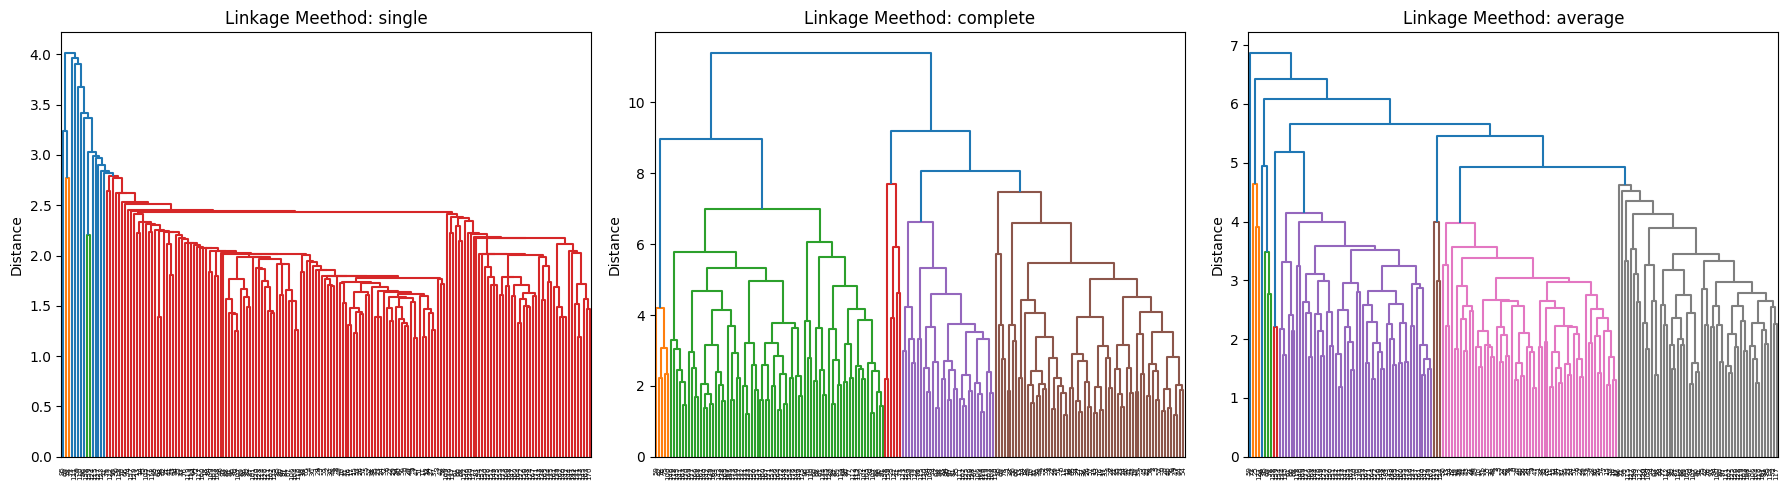

In [14]:
# test different linkage methods and metrics and compare the results
# add code here
linkage_methods = ["single", "complete", "average"] # create a list with the 3 methods
fid, axs = plt.subplots(1, len(linkage_methods), figsize = (18, 5)) # create a matrix 1 row 3 columns with 3 diferents figures

# Iterate through each Linkage methods
for i, linkage_method in enumerate(linkage_methods):
    Z = linkage(wines_scaled, method = linkage_method)

    # Plot dendogram
    axs[i].set_title(f'Linkage Meethod: {linkage_method}')
    dendrogram(Z, ax=axs[i])
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

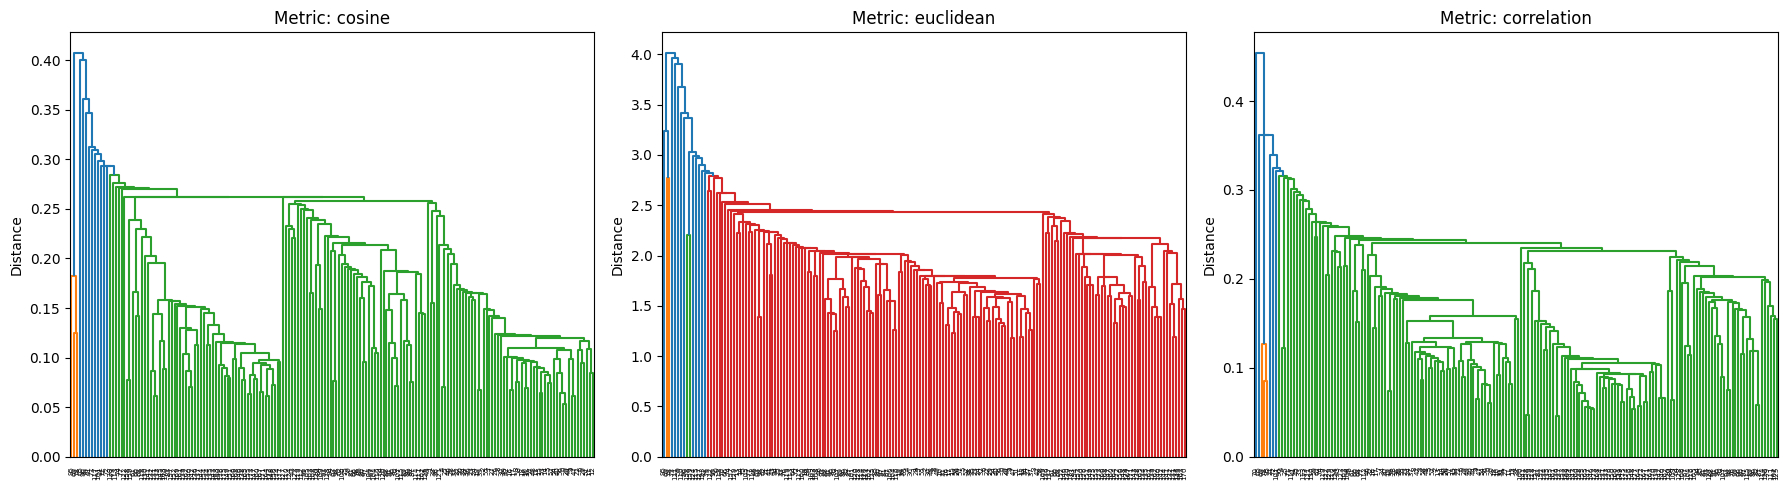

In [15]:
# Diferente Metrics
metrics = ["cosine", "euclidean", "correlation"]
fig, axs = plt.subplots(1, len(metrics), figsize = (18, 5))

for i, metric in enumerate(metrics):
    Z = linkage(wines_scaled, method = "single", metric = metric)

    axs[i].set_title(f'Metric: {metric}')
    dendrogram(Z, ax=axs[i])
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [16]:
# perform k-means clustering on the dataset
# add code here
from sklearn.cluster import KMeans

k = 3
kmean_wines = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
kmean_wines.fit(wines_scaled)
labels = kmean_wines.labels_
centroids = kmean_wines.cluster_centers_

pd.crosstab(labels, wines["target"], rownames = ["clusters"])

target,0,1,2
clusters,,,
0,0,65,0
1,0,3,48
2,59,3,0


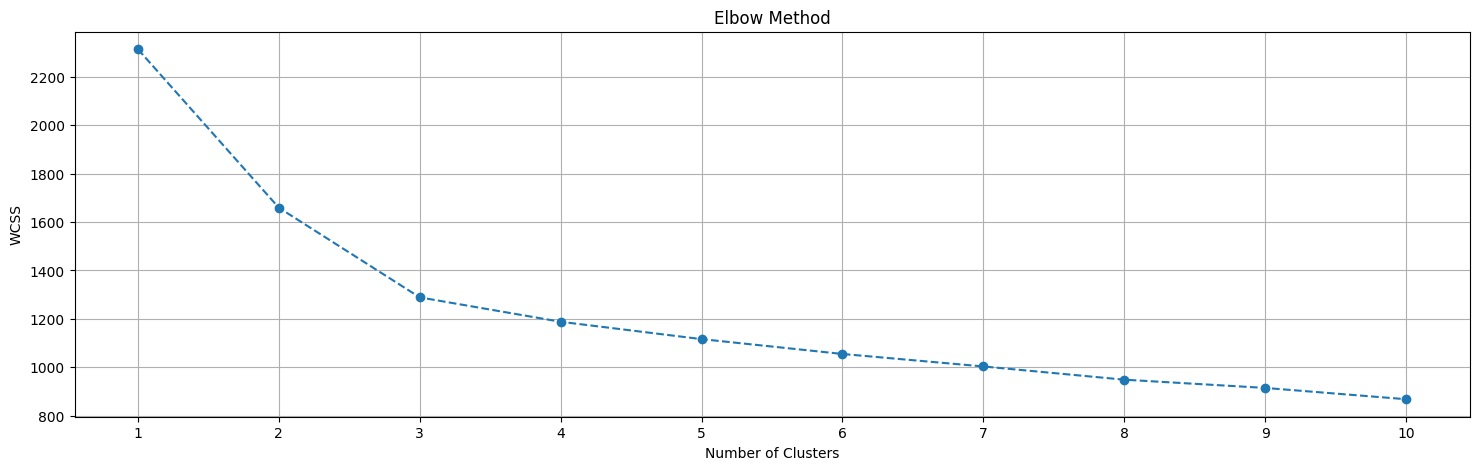

In [17]:
# use the elbow method to find the optimal number of clusters
# add code here
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(wines_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(18,5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = "--")
plt.title("Elbow Method")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [18]:
# compare the results of hierarchical and k-means clustering
#